# From Data to Features (Without Solutions)
This notebook includes the preprocessing steps for text (in Natural Language Processing) and images (in Computer Vision). Preprocessing involves the steps to transform the texts and images into a clean and consistent format that can be fed into an AI/ML model.

## Authors
- Hossein A. Rahmani (hossein.rahmani.22@ucl.ac.uk)
- Xiao Fu (xiao.fu.20@ucl.ac.uk)

## Learning Outcomes
- **Fundamental Concepts:** Gain a deep understanding of the foundational concepts in text and image processing, including tokenization, feature extraction, image representation, and manipulation.
- **Data Preprocessing:** Learn how to preprocess textual data, including tasks such as text cleaning, tokenization, stopword removal, and stemming/lemmatization. Understand the importance of data preprocessing in improving model performance.
- **Image Data Representation:** Learn different methods to represent image data as numerical arrays, including grayscale and color image representations, image normalization, and resizing.
- **Hands-on Programming Skills:** Develop proficiency in using Python libraries such as NLTK, scikit-learn, TensorFlow, and Keras to implement text and image processing techniques.

## Task

The notebook will then demonstrate how to implement some text and image preprocssing techniques for machine learning and AI applicaitons

## Text Processing in Natural Language Processing

Source:
- https://towardsdatascience.com/text-preprocessing-in-natural-language-processing-using-python-6113ff5decd8
- https://github.com/Shubha23/Text-processing-NLP/tree/master

Here, we introduce the text preprocessing steps and implement them using well-known Python libraries such as NLTK. In this notebook, we consider the following steps to preprocess text and clean them. However, there might be some other steps that could be considered based on the tasks/applications you preprocess the text for. 

- Applications
- Parsing
- Tokenization
- Normalisation
- Stop words removal
- Lemmatization
- Stemming
- Bag-of-Word Representation

### Applications

Review Sentiment Class Prediction

### Importing Libraries

In [62]:
# import libraries
import pandas as pd
import string as st # using for punctuation

# for text processing
import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer, WordNetLemmatizer

# Generate a basic word cloud 
from wordcloud import WordCloud

# to plot image
import matplotlib.pyplot as plt

# to include bag of word
from sklearn.feature_extraction.text import CountVectorizer

### Loading Data

For our Text Processing task, we use a review dataset on Amazon products (https://github.com/pycaret/pycaret/blob/master/datasets/amazon.csv). The dataset includes two columns, `review` and `sentiment`. The review shows the user reviews on the producs and the sentiment indicates the polarity of sentiment review (`1` for `positive` and `0` for `negative`). 

In [34]:
# Read the data. Here it is already in .csv format
text_data = pd.read_csv('data/review_amazon.csv')
text_data.head()

,review,sentiment
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


### Text Preprocessing Steps

#### Normalisation (e.g. removing punctuations)

We begin by implementing text normalization, a process that encompasses various strategies like eliminating punctuation and converting text to lowercase. Specifically, we initiate the text normalization process by removing punctuation marks from the reviews. This preparation step readies the reviews for subsequent tokenization. To achieve this, we create a function named `remove_func` which serves to strip away punctuation marks. The function is then executed on the review dataset, and the results are appended in a new column dedicated to storing the punctuation-removed reviews.

In [35]:
# Remove all punctuations from the text
def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

Apply ` remove_punct()` to raw reviews

In [36]:
text_data['removed_punc'] = text_data['review'].apply(lambda x: remove_punct(x))
    

In [37]:
text_data.head()

,review,sentiment,removed_punc
0,This is a one of the best apps acording to a b...,1,This is a one of the best apps acording to a b...
1,This is a pretty good version of the game for ...,1,This is a pretty good version of the game for ...
2,this is a really cool game. there are a bunch ...,1,this is a really cool game there are a bunch o...
3,"This is a silly game and can be frustrating, b...",1,This is a silly game and can be frustrating bu...
4,This is a terrific game on any pad. Hrs of fun...,1,This is a terrific game on any pad Hrs of fun ...


#### Tokenization

Tokenization involves breaking down the text into individual tokens or units, which are then amenable to various preprocessing techniques that contribute to generating a high-quality text input for the model. In our case, we utilize the `word_tokenize` method sourced from the `NLTK` package for this purpose. This method effectively splits the text into distinct tokens, allowing us to proceed with subsequent preprocessing operations.

Apply `word_tokenize()` to normalised reviews

In [38]:
import nltk
nltk.download('punkt_tab')
# using nltk's word tokenizer
text_data['tokens'] = text_data['removed_punc'].apply(lambda x: word_tokenize(x))


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/beatricezhejiang/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [39]:
text_data.head()

,review,sentiment,removed_punc,tokens
0,This is a one of the best apps acording to a b...,1,This is a one of the best apps acording to a b...,"[This, is, a, one, of, the, best, apps, acordi..."
1,This is a pretty good version of the game for ...,1,This is a pretty good version of the game for ...,"[This, is, a, pretty, good, version, of, the, ..."
2,this is a really cool game. there are a bunch ...,1,this is a really cool game there are a bunch o...,"[this, is, a, really, cool, game, there, are, ..."
3,"This is a silly game and can be frustrating, b...",1,This is a silly game and can be frustrating bu...,"[This, is, a, silly, game, and, can, be, frust..."
4,This is a terrific game on any pad. Hrs of fun...,1,This is a terrific game on any pad Hrs of fun ...,"[This, is, a, terrific, game, on, any, pad, Hr..."


#### Stop Words Removal

Moving forward, the subsequent task involves eliminating stop words from the tokenized reviews. To achieve this, we leverage the NLTK corpus list, which serves as a reference for identifying stop words. It's worth noting that a tailored and user-defined list of stop words could also be generated and employed, thereby restricting the identification of stop words within the input text to the specific terms listed in the custom list. This approach provides an added layer of control over the stop word removal process.

In [40]:
nltk.download('stopwords')
# nltk stopwords
stopwords = nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatricezhejiang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Implement `remove_stopwords()` where remove all stop words from a list `text`

In [41]:
def remove_stopwords(text):
    return [word for word in text if word not in stopwords]

text_data['clean_tokens'] = text_data['tokens'].apply(lambda x : remove_stopwords(x))

        
    

Apply ` remove_stopwords()` to tokenized reviews

In [42]:
text_data.head()

,review,sentiment,removed_punc,tokens,clean_tokens
0,This is a one of the best apps acording to a b...,1,This is a one of the best apps acording to a b...,"[This, is, a, one, of, the, best, apps, acordi...","[This, one, best, apps, acording, bunch, peopl..."
1,This is a pretty good version of the game for ...,1,This is a pretty good version of the game for ...,"[This, is, a, pretty, good, version, of, the, ...","[This, pretty, good, version, game, free, Ther..."
2,this is a really cool game. there are a bunch ...,1,this is a really cool game there are a bunch o...,"[this, is, a, really, cool, game, there, are, ...","[really, cool, game, bunch, levels, find, gold..."
3,"This is a silly game and can be frustrating, b...",1,This is a silly game and can be frustrating bu...,"[This, is, a, silly, game, and, can, be, frust...","[This, silly, game, frustrating, lots, fun, de..."
4,This is a terrific game on any pad. Hrs of fun...,1,This is a terrific game on any pad Hrs of fun ...,"[This, is, a, terrific, game, on, any, pad, Hr...","[This, terrific, game, pad, Hrs, fun, My, gran..."


#### Lemmatization

For the purpose of lemmatizing words, we utilize the function provided by WordNet within the NLTK framework. This function proves effective in reducing words to their base or lemma forms. Notably, if a given word is not located within the WordNet database, the function retains the word in its original state without any alteration.

In [43]:
# defining word lemmatizer class
word_net = WordNetLemmatizer()

In [44]:
# applying lemmatization on tokens
def lemmatize(text):
    return [word_net.lemmatize(word) for word in text]

Apply ` lemmatize()` to stop removed reviews

In [45]:
text_data['lemmatize'] = text_data['clean_tokens'].apply(lambda x : lemmatize(x))

In [46]:
text_data.head()

,review,sentiment,removed_punc,tokens,clean_tokens,lemmatize
0,This is a one of the best apps acording to a b...,1,This is a one of the best apps acording to a b...,"[This, is, a, one, of, the, best, apps, acordi...","[This, one, best, apps, acording, bunch, peopl...","[This, one, best, apps, acording, bunch, peopl..."
1,This is a pretty good version of the game for ...,1,This is a pretty good version of the game for ...,"[This, is, a, pretty, good, version, of, the, ...","[This, pretty, good, version, game, free, Ther...","[This, pretty, good, version, game, free, Ther..."
2,this is a really cool game. there are a bunch ...,1,this is a really cool game there are a bunch o...,"[this, is, a, really, cool, game, there, are, ...","[really, cool, game, bunch, levels, find, gold...","[really, cool, game, bunch, level, find, golde..."
3,"This is a silly game and can be frustrating, b...",1,This is a silly game and can be frustrating bu...,"[This, is, a, silly, game, and, can, be, frust...","[This, silly, game, frustrating, lots, fun, de...","[This, silly, game, frustrating, lot, fun, def..."
4,This is a terrific game on any pad. Hrs of fun...,1,This is a terrific game on any pad Hrs of fun ...,"[This, is, a, terrific, game, on, any, pad, Hr...","[This, terrific, game, pad, Hrs, fun, My, gran...","[This, terrific, game, pad, Hrs, fun, My, gran..."


#### Stemming

For extracting the word stems, we employ the PorterStemmer algorithm, a component of the NLTK package. This algorithm operates based on the approach outlined by "Porter, M. "An algorithm for suffix stripping" in the Program 14.3 (1980): 130-137". The PorterStemmer algorithm systematically shortens words to their root forms, facilitating the reduction of words to their essential core. This approach proves valuable in contexts where a more aggressive word reduction technique is desired, compared to lemmatization.

In [47]:
# PorterStemmer class from NLTK
ps = PorterStemmer()

In [48]:
# Apply stemming to get root words 
def stemming(text):
    return [ps.stem(word) for word in text]

Apply ` stemming()` to lemmatized reviews

In [49]:
text_data['stemming'] = text_data['clean_tokens'].apply(lambda x : stemming(x))

In [50]:
text_data.head()

,review,sentiment,removed_punc,tokens,clean_tokens,lemmatize,stemming
0,This is a one of the best apps acording to a b...,1,This is a one of the best apps acording to a b...,"[This, is, a, one, of, the, best, apps, acordi...","[This, one, best, apps, acording, bunch, peopl...","[This, one, best, apps, acording, bunch, peopl...","[thi, one, best, app, acord, bunch, peopl, i, ..."
1,This is a pretty good version of the game for ...,1,This is a pretty good version of the game for ...,"[This, is, a, pretty, good, version, of, the, ...","[This, pretty, good, version, game, free, Ther...","[This, pretty, good, version, game, free, Ther...","[thi, pretti, good, version, game, free, there..."
2,this is a really cool game. there are a bunch ...,1,this is a really cool game there are a bunch o...,"[this, is, a, really, cool, game, there, are, ...","[really, cool, game, bunch, levels, find, gold...","[really, cool, game, bunch, level, find, golde...","[realli, cool, game, bunch, level, find, golde..."
3,"This is a silly game and can be frustrating, b...",1,This is a silly game and can be frustrating bu...,"[This, is, a, silly, game, and, can, be, frust...","[This, silly, game, frustrating, lots, fun, de...","[This, silly, game, frustrating, lot, fun, def...","[thi, silli, game, frustrat, lot, fun, definit..."
4,This is a terrific game on any pad. Hrs of fun...,1,This is a terrific game on any pad Hrs of fun ...,"[This, is, a, terrific, game, on, any, pad, Hr...","[This, terrific, game, pad, Hrs, fun, My, gran...","[This, terrific, game, pad, Hrs, fun, My, gran...","[thi, terrif, game, pad, hr, fun, my, grandkid..."


#### Clean Sentences
Implement `return_sentences()` to build sentences from the list `tokens`

In [51]:
# Create sentences to get clean text as input for vectors
def return_sentences(tokens):
    return " ".join([word for word in tokens])

Apply ` return_sentences()` to lemmatized reviews

In [52]:
text_data['clean_review'] = text_data['lemmatize'].apply(lambda x: return_sentences(x))

In [53]:
text_data.head()

,review,sentiment,removed_punc,tokens,clean_tokens,lemmatize,stemming,clean_review
0,This is a one of the best apps acording to a b...,1,This is a one of the best apps acording to a b...,"[This, is, a, one, of, the, best, apps, acordi...","[This, one, best, apps, acording, bunch, peopl...","[This, one, best, apps, acording, bunch, peopl...","[thi, one, best, app, acord, bunch, peopl, i, ...",This one best apps acording bunch people I agr...
1,This is a pretty good version of the game for ...,1,This is a pretty good version of the game for ...,"[This, is, a, pretty, good, version, of, the, ...","[This, pretty, good, version, game, free, Ther...","[This, pretty, good, version, game, free, Ther...","[thi, pretti, good, version, game, free, there...",This pretty good version game free There LOTS ...
2,this is a really cool game. there are a bunch ...,1,this is a really cool game there are a bunch o...,"[this, is, a, really, cool, game, there, are, ...","[really, cool, game, bunch, levels, find, gold...","[really, cool, game, bunch, level, find, golde...","[realli, cool, game, bunch, level, find, golde...",really cool game bunch level find golden egg s...
3,"This is a silly game and can be frustrating, b...",1,This is a silly game and can be frustrating bu...,"[This, is, a, silly, game, and, can, be, frust...","[This, silly, game, frustrating, lots, fun, de...","[This, silly, game, frustrating, lot, fun, def...","[thi, silli, game, frustrat, lot, fun, definit...",This silly game frustrating lot fun definitely...
4,This is a terrific game on any pad. Hrs of fun...,1,This is a terrific game on any pad Hrs of fun ...,"[This, is, a, terrific, game, on, any, pad, Hr...","[This, terrific, game, pad, Hrs, fun, My, gran...","[This, terrific, game, pad, Hrs, fun, My, gran...","[thi, terrif, game, pad, hr, fun, my, grandkid...",This terrific game pad Hrs fun My grandkids lo...


#### WordCloud

A **word cloud** is a visual depiction of text where word frequency is represented through varying font size or color. More frequent words appear larger, offering a quick overview of prominent terms and themes in a text or set of texts. It's a tool for summarizing and visualizing textual information.

In [59]:
text = " ".join([review for review in text_data['clean_review']])

font_path = '/Users/beatricezhejiang/Library/Fonts/FiraCode-Retina.ttf'
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100).generate(text)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

ValueError: Only supported for TrueType fonts

#### Bag-of-Word Representation

Here is process the text data and convert it to number to prepare them to fed to ML model as machine can only understand the numbers. The **Bag of Words (BoW):** is a text representation method treating text as a collection of words, focusing on their frequency while disregarding order and grammar. To do this, we use **CountVectorizer()** from the **scikit-learn** package. Scikit-learn is a tool that transforms text into a word count matrix, enabling machine learning by converting text data into numerical format.

In [60]:
count_vect = CountVectorizer()
review_BOG = count_vect.fit_transform(text_data['clean_review'])
print("Type of output: ", type(review_BOG))
print("Shape of Bag-of-Words: ", review_BOG.shape)
print(review_BOG[0, :])

Type of output:  <class 'scipy.sparse.csr.csr_matrix'>
Shape of Bag-of-Words:  (20000, 22724)
  (0, 19984)	1
  (0, 13962)	1
  (0, 2818)	1
  (0, 1989)	1
  (0, 955)	1
  (0, 3393)	1
  (0, 14617)	1
  (0, 1269)	1
  (0, 3085)	1
  (0, 6693)	1
  (0, 14851)	2
  (0, 20287)	1
  (0, 11453)	1
  (0, 16299)	1
  (0, 19049)	1


## Image Preprocessing in Computer Vision

Source: https://www.section.io/engineering-education/image-preprocessing-in-python/

### Importing Libraries

In [2]:
# importing libraries
import os
import glob
! pip install scikit-image
import skimage
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline



In [ ]:
# import libraries for data augmentation
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator

### Loading Dataset

Frist, we set the path for the Animal (https://www.kaggle.com/datasets/vishweshsalodkar/wild-animals?resource=download) dataset that we use for our image preprocessing, then we load all the exsiting images from the selected class

In [3]:
# Importing and Loading the data
dataset_path = 'data/Animals'
class_names = ['Cheetah', 'Jaguar', 'Leopard', 'Lion','Tiger']

# apply glob module to retrieve files/pathnames  
animal_path = os.path.join(dataset_path, class_names[1], '*') # generating the path of all Jaguar class images
animal_path = glob.glob(animal_path) # laoding all Jaguar class images paths

#### Showing an exmaple of the dataset

To confirm the correct loading of our data, we attempt to access an image file within the dataset:

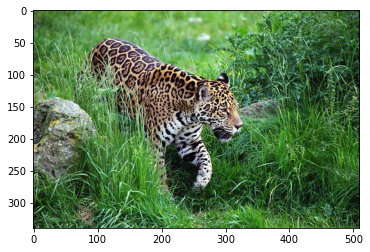

In [4]:
# accessing an image file from the dataset classes
image = skimage.io.imread(animal_path[4])

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

#### RGB channels of image

Prior to delving into preprocessing methods, it's prudent to initially examine the RGB channels present in our original image

Text(0.5, 0.98, 'Original & RGB image channels')

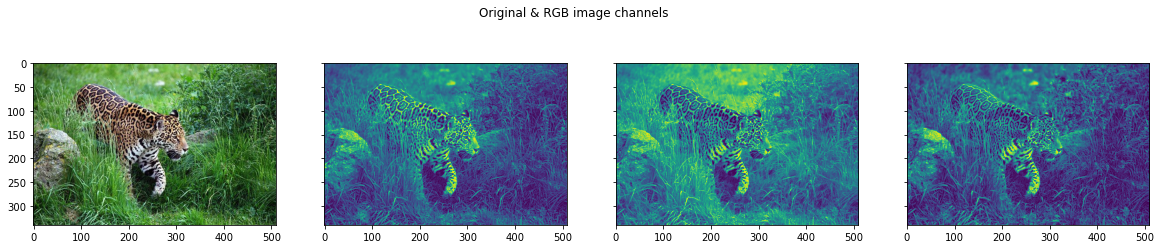

In [5]:
# plotting the original image and the RGB channels  
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  # Original image
im2.imshow(image[:, : , 0]) # Red
im3.imshow(image[:, : , 1]) # Green
im4.imshow(image[:, : , 2]) # Blue

i.suptitle('Original & RGB image channels')

### Image Preprocessing Techniques

#### Grayscale Conversion

As color is often unnecessary for image recognition, opting for grayscale can be a prudent choice. This not only trims down the pixel count in an image but also curtails the computational load. To put this into action, run the provided code to convert the initial image to grayscale:

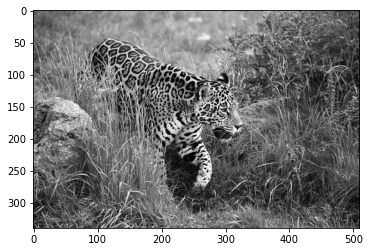

In [6]:
gray_image = skimage.color.rgb2gray(image) # change the image color
plt.imshow(gray_image, cmap = 'gray') # show image

#### Normalization

Normalization is commonly applied to transform the pixel values of an image into a standard or more recognizable scale.

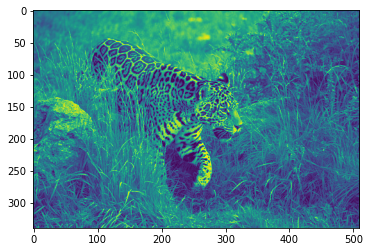

In [7]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

#### Data Augmentation

Data augmentation is the process of making minor alterations to existing data to increase its diversity without collecting new data. It is a technique used for enlarging a dataset. Standard data augmentation techniques include horizontal & vertical flipping, rotation, cropping, shearing, etc. Here, we use `Keras's ImageDataGenerator` class to augment our data. This is because it provides a quick and easy way to augment your images. In addition, it supports augmentation techniques such as flips, rotations, brightness change, etc. Let's now look at the most used data augmentation techniques:

In [8]:
def data_augmentation(image, datagen):
    # expand dimension to one sample
    samples = expand_dims(image, 0)

    # create an iterator
    it = datagen.flow(samples, batch_size=1)
    fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

    # generate batch of images
    for i in range(3):
        # convert to unsigned integers
        image = next(it)[0].astype('uint8')
        # plot image
        im[i].imshow(image)

##### Shifting
This is the process of shifting image pixels horizontally or vertically.

In [9]:
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
image = skimage.io.imread(animal_path[4])
data_augmentation(image, datagen)

NameError: name 'ImageDataGenerator' is not defined

##### Flipping
This reverses the rows or columns of pixels in either vertical or horizontal cases, respectively.

In [10]:
from keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
image = skimage.io.imread(animal_path[4])
data_augmentation(image, datagen)

ModuleNotFoundError: No module named 'keras'

##### Rotation
This process involves rotating an image by a specified degree.

In [ ]:
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')
image = skimage.io.imread(animal_path[4])
data_augmentation(image, datagen)

## Summary

By engaging with this notebook, you will:

- Learn data preprocessing steps for both text and image data.
- Acquire skills in feature extraction, classification, and fusion for enhanced model performance.
- Understand and experience in Python libraries for real-world applications.